In [1]:
#import modulos 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("train_new.csv")
df.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_150000,0,11.2677,2.9361,8.9304,7.1718,12.6826,1.4096,5.5708,18.9360,...,8.2134,5.6091,1.0664,1.5259,13.5576,2.5019,-2.0697,9.6857,15.1098,17.4865
1,train_150001,0,9.1546,2.2189,7.5189,4.6808,10.2911,-11.7870,4.6796,17.1627,...,-1.5557,6.5153,-1.2182,-0.8338,16.1222,-0.6614,3.5941,8.8340,16.6121,10.2198
2,train_150002,0,11.4313,-5.1949,7.7460,11.4524,12.4896,-7.3724,6.0505,14.5978,...,0.7787,2.0775,2.1534,-5.2059,18.3996,0.7312,9.8636,9.7021,8.9396,-6.0436
3,train_150003,0,13.0385,1.1188,9.4104,5.8001,14.5713,10.0653,6.3155,15.8367,...,8.6692,4.4282,4.1775,5.4931,14.6043,-2.1328,3.3064,8.9362,13.9488,-22.6320
4,train_150004,0,9.7065,-4.6400,8.8325,6.5866,13.8771,-6.1068,4.6322,15.3737,...,4.6171,8.6005,5.5753,6.8578,14.3485,1.7902,-0.7680,7.9468,15.1672,-3.9796


In [3]:
print('Informação dos dados:')
df.info()
print('Descrição dos dados:')
df.describe()

print('numero de dados nulos:')
df.isna().sum().sum()

print('numero de dados duplicados:')
df.duplicated().sum().sum()

Informação dos dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 77.1+ MB
Descrição dos dados:
numero de dados nulos:
numero de dados duplicados:


0

ETA

Text(0.5, 1.0, 'Target variable count')

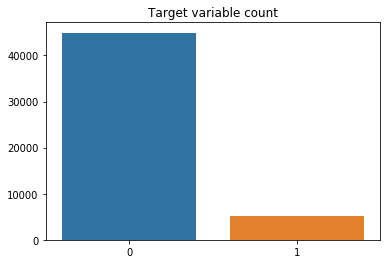

In [147]:
# variavel target 
x = df['target'].value_counts().values
sns.barplot([0,1], x)
plt.title('Target variable count')

Nota-se uma alto desbalanço no conjunto de dados para a variavel Target

In [148]:
# balanceando a variavel Target
from sklearn.utils import resample

t_0 = df[df.target == 0]
t_1 = df[df.target == 1]

t_0_balanced = resample(t_0, replace = False, n_samples = len(t_1), random_state = 13)

train_balanced = pd.concat([t_0_balanced, t_1])
train_balanced.target.value_counts()

0    5064
1    5064
Name: target, dtype: int64

Text(0.5, 1.0, 'Target variable count')

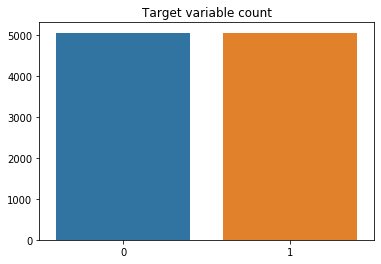

In [149]:
# variavel target 

x = train_balanced['target'].value_counts().values
sns.barplot([0,1], x)
plt.title('Target variable count')

In [150]:
X = train_balanced.drop(['ID_code', 'target'], axis=1)
y = train_balanced['target']

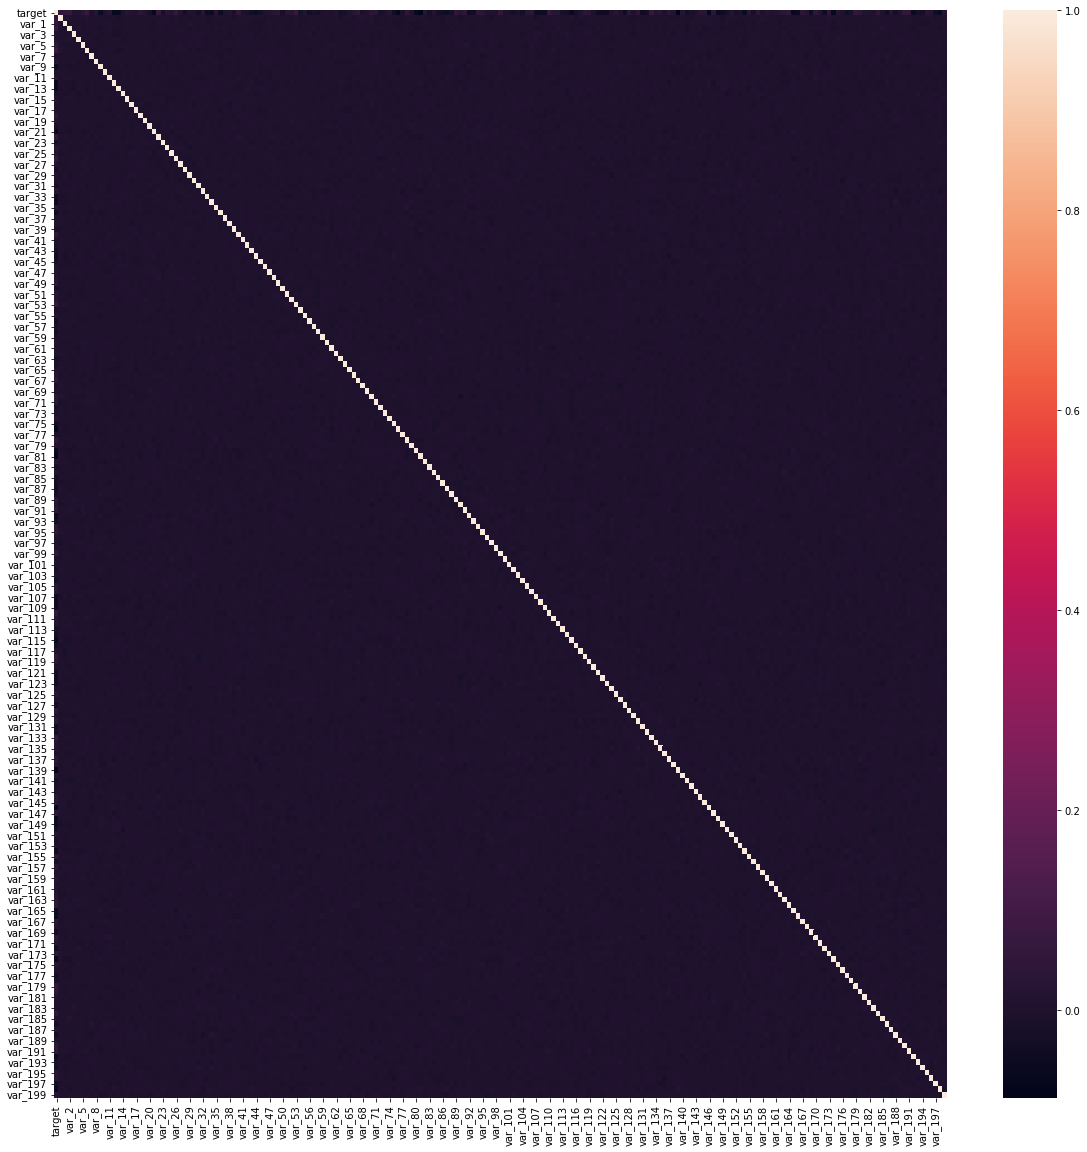

In [151]:
# matriz de correlação
plt.figure(figsize=(20,20))
sns.heatmap(df.corr())

In [152]:
#def plot_feature_distribution(df):
    #plt.title("Distribution of all features")
    #fig, axes = plt.subplots(20, 10, figsize=(20, 50))
    #fig.subplots_adjust(hspace=1.01, wspace=0.1)

    #for i, col in enumerate(df.columns[1:]):
        #plt.subplot(20,10,i+1)
        #sns.histplot(data=df, x=col, kde=True, hue='target')
        #plt.tick_params(axis='both', left=False, bottom=False, labelleft=False)
        #plt.ylabel('')
        
# distribuição dos dados
#plot_feature_distribution(df)
#Todas as distribuições estão próximos de uma distribuição normal.

# Model training

In [153]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_curve

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=30)

In [155]:
model_list = []
score_list =[]

## Logistic Regression

In [156]:
model = LogisticRegression()
model.fit(X_train, y_train)
score = accuracy_score(y_test, model.predict(X_test))
print("Model : LogisticRegression Classifier")
print('=====================================')
print('Accuracy : {:0.2f}'.format(score))
model_list.append('LogisticRegression')
score_list.append(score)
print('=====================================')
print('Recall_Score : {:0.2f}'.format(recall_score(y_test, model.predict(X_test))))
print('=====================================')
print('precission_Score : {:0.2f}'.format(precision_score(y_test, model.predict(X_test))))

Model : LogisticRegression Classifier
Accuracy : 0.79
Recall_Score : 0.81
precission_Score : 0.77


## Gradient Boosting

In [157]:
model2 = GradientBoostingClassifier(n_estimators=300, learning_rate=0.01)
model2.fit(X_train, y_train)
score2 = accuracy_score(y_test, model2.predict(X_test))
print("Model : GradientBoosting Classifier")
print('=====================================')
print('Accuracy : {:0.2f}'.format(score2))
model_list.append('GradientBoostingClassifier')
score_list.append(score2)
print('=====================================')
print('Recall_Score : {:0.2f}'.format(recall_score(y_test, model2.predict(X_test))))
print('=====================================')
print('precission_Score : {:0.2f}'.format(precision_score(y_test, model2.predict(X_test))))

Model : GradientBoosting Classifier
Accuracy : 0.67
Recall_Score : 0.66
precission_Score : 0.67


## Random Forest

In [158]:
model3 = RandomForestClassifier(random_state=5)
model3.fit(X_train, y_train)
score3 = accuracy_score(y_test, model3.predict(X_test))
print("Model : RandomForest Classifier")
print('=====================================')
print('Accuracy : {:0.2f}'.format(score3))
model_list.append('RandomForestClassifier')
score_list.append(score3)
print('=====================================')
print('Recall_Score : {:0.2f}'.format(recall_score(y_test, model3.predict(X_test))))
print('=====================================')
print('precission_Score : {:0.2f}'.format(precision_score(y_test, model3.predict(X_test))))

Model : RandomForest Classifier
Accuracy : 0.74
Recall_Score : 0.76
precission_Score : 0.73


## AdaBoost

In [159]:
model4 = AdaBoostClassifier()
model4.fit(X_train, y_train)
score4 = accuracy_score(y_test, model4.predict(X_test))
print("Model : AdaBoost Classifier")
print('=====================================')
print('Accuracy : {:0.2f}'.format(score4))
model_list.append('AdaBoostClassifier')
score_list.append(score4)
print('=====================================')
print('Recall_Score : {:0.2f}'.format(recall_score(y_test, model4.predict(X_test))))
print('=====================================')
print('precission_Score : {:0.2f}'.format(precision_score(y_test, model4.predict(X_test))))

Model : AdaBoost Classifier
Accuracy : 0.71
Recall_Score : 0.71
precission_Score : 0.70


## SVC

In [160]:
model5 = SVC(kernel = 'rbf',  random_state = 2)
model5.fit(X_train, y_train)
score5 = accuracy_score(y_test, model5.predict(X_test))
print("Model : Support vector Classifier")
print('=====================================')
print('Accuracy : {:0.2f}'.format(score5))
model_list.append('Support vectorClassifier')
score_list.append(score5)
print('=====================================')
print('Recall_Score : {:0.2f}'.format(recall_score(y_test, model5.predict(X_test))))
print('=====================================')
print('precission_Score : {:0.2f}'.format(precision_score(y_test, model5.predict(X_test))))

Model : Support vector Classifier
Accuracy : 0.75
Recall_Score : 0.76
precission_Score : 0.74


## GaussianNB

In [161]:
model6 = GaussianNB()
model6.fit(X_train, y_train)
score6 = accuracy_score(y_test, model6.predict(X_test))
print("Model : GaussianNB")
print('=====================================')
print('Accuracy : {:0.2f}'.format(score6))
model_list.append('GaussianNB')
score_list.append(score6)
print('=====================================')
print('Recall_Score : {:0.2f}'.format(recall_score(y_test, model6.predict(X_test))))
print('=====================================')
print('precission_Score : {:0.2f}'.format(precision_score(y_test, model6.predict(X_test))))

Model : GaussianNB
Accuracy : 0.79
Recall_Score : 0.81
precission_Score : 0.77


##  MLP

In [162]:
model7 = MLPClassifier()
model7.fit(X_train, y_train)
score7 = accuracy_score(y_test, model7.predict(X_test))
print("Model : MLP")
print('=====================================')
print('Accuracy : {:0.2f}'.format(score7))
model_list.append('MLP')
score_list.append(score7)
print('=====================================')
print('Recall_Score : {:0.2f}'.format(recall_score(y_test, model7.predict(X_test))))
print('=====================================')
print('precission_Score : {:0.2f}'.format(precision_score(y_test, model7.predict(X_test))))

Model : MLP
Accuracy : 0.79
Recall_Score : 0.81
precission_Score : 0.77


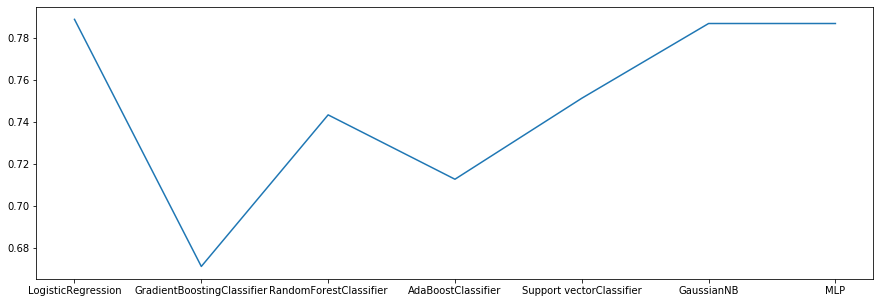

In [163]:
plt.figure(figsize=(15, 5))
sns.lineplot(model_list, score_list)


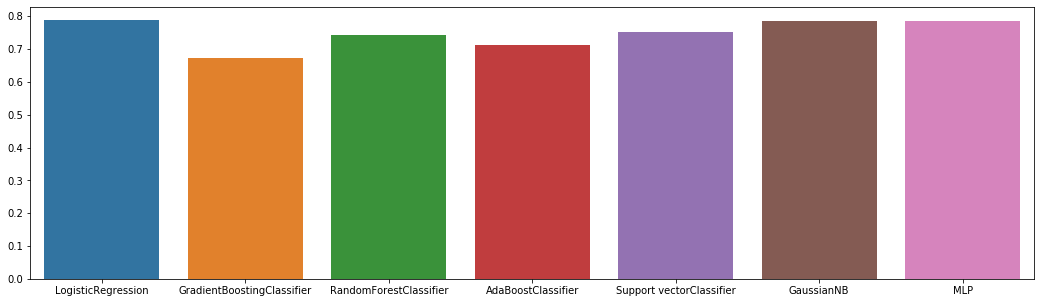

In [164]:
plt.figure(figsize=(18, 5))
sns.barplot(model_list, score_list)